### Застосуйте описані вище методи кластеризації на датасеті винних сортів UCI ML Wine Data Set.
#### Завантажити його можна командою datasets.load_wine. Результати кластеризацій оформіть у вигляді файлу ipynb.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [5]:
wine_df =  datasets.load_wine()

In [26]:
model = KMeans(n_clusters=7)

In [27]:
model.fit(wine_df.data)

C:\OneDrive\PythonProjects\Study\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [28]:
predictions = model.predict(wine_df.data)

In [29]:
print(predictions)

[3 3 1 5 2 5 1 1 3 3 5 1 1 3 5 1 1 3 5 6 6 6 3 3 6 6 1 1 6 3 1 5 3 1 3 6 6
 3 3 6 6 3 3 2 6 3 3 3 3 1 3 1 1 1 3 3 3 1 1 4 2 4 2 0 0 2 4 4 2 2 6 0 4 3
 6 0 0 4 2 4 0 2 2 4 4 4 4 4 2 2 4 4 4 0 0 6 2 0 2 0 2 4 0 0 2 0 4 4 0 2 4
 0 2 0 0 0 4 0 0 4 2 4 0 0 0 0 0 4 0 4 2 4 4 2 2 2 2 4 4 4 2 6 4 4 6 6 0 2
 2 4 4 4 0 2 2 2 4 6 2 2 4 2 4 2 2 4 2 2 2 2 4 4 2 2 2 6 6 4]


In [32]:
cluster_0 = wine_df.data[predictions == 0]
cluster_1 = wine_df.data[predictions == 1]
cluster_2 = wine_df.data[predictions == 2]
cluster_3 = wine_df.data[predictions == 3]
cluster_4 = wine_df.data[predictions == 4]
cluster_5 = wine_df.data[predictions == 5]
cluster_6 = wine_df.data[predictions == 6]

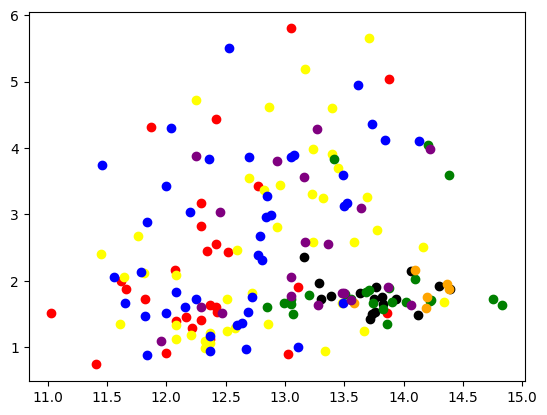

In [33]:
plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'black')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'yellow')
plt.scatter(cluster_3[:,0] , cluster_3[:,1] , color = 'green')
plt.scatter(cluster_4[:,0] , cluster_4[:,1] , color = 'blue')
plt.scatter(cluster_5[:,0] , cluster_5[:,1] , color = 'Orange')
plt.scatter(cluster_6[:,0] , cluster_6[:,1] , color = 'Purple')

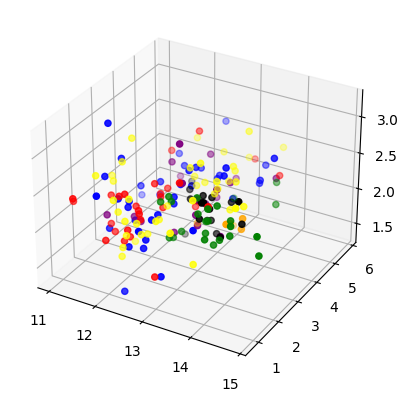

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_0[:,0] , cluster_0[:,1], cluster_0[:,2], color = 'red')
ax.scatter(cluster_1[:,0] , cluster_1[:,1], cluster_1[:,2], color = 'black')
ax.scatter(cluster_2[:,0] , cluster_2[:,1], cluster_2[:,2], color = 'yellow')
ax.scatter(cluster_3[:,0] , cluster_3[:,1], cluster_3[:,2], color = 'green')
ax.scatter(cluster_4[:,0] , cluster_4[:,1], cluster_4[:,2], color = 'blue')
ax.scatter(cluster_5[:,0] , cluster_5[:,1], cluster_5[:,2], color = 'orange')
ax.scatter(cluster_6[:,0] , cluster_6[:,1], cluster_6[:,2], color = 'purple')

plt.show()

______________

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [95]:
dbscan = DBSCAN(eps=50, min_samples=4)

In [96]:
dbscan.fit(wine_df.data)

DBSCAN(eps=50, min_samples=4)

In [97]:
pca = PCA(n_components=2).fit(wine_df.data)
pca_2d = pca.transform(wine_df.data)

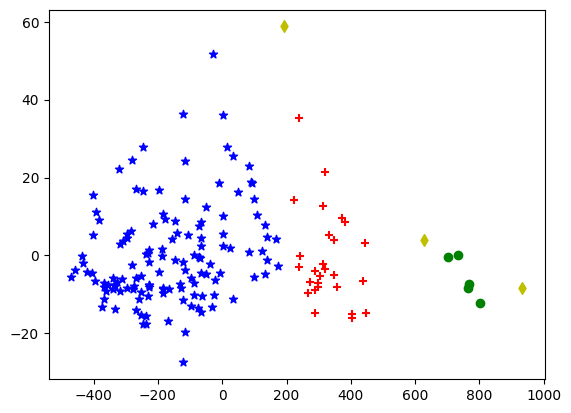

In [98]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')    

_________________________________

In [99]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [100]:
mergings = linkage(wine_df.data, method = 'complete')

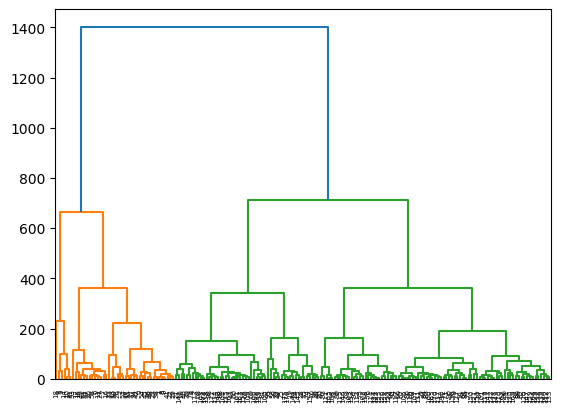

In [106]:
clusters = dendrogram(mergings,leaf_rotation=90)